<a href="https://colab.research.google.com/github/rg599096/Playstore-analysis/blob/main/indivisual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mounted Google Drive

Mounted at /content/drive


In [ ]:
df =pd.read_csv('/content/Play Store Data.csv')   # Read the Google play store Data
df_review = pd.read_csv('/content/User Reviews.csv') # Read the User Reviews

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10841, 13)

#**2. Cleaning Data**

Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make easy our analysis

#**Category**

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [ ]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can make NaN category value. At that time we can get a clean data. I used shift() method that is found Pandas library.

In [ ]:
df.loc[10472] = df.loc[10472].shift()
df['App'].loc[10472] = df['Category'].loc[10472]
df['Category'].loc[10472] = np.nan
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

#**Rating**

In [ ]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

Data type of Rating is object. If we convert from string to numeric, we can make easy.

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].dtype

dtype('float64')

#**Reviews**

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
df[df['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df['Reviews'] = df.Reviews.replace("0.0",0)
df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype

dtype('float64')

#**Size**

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.

In [ ]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000") # All size values became the kilobyte type.
df['Size'] = df.Size.str.replace("k","")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] =df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

#**Installs**

In [ ]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [ ]:
df['Installs'] = df.Installs.str.replace(",","")
df['Installs'] = df.Installs.str.replace("+","")
df['Installs'] = df.Installs.replace("Free",np.nan)
df['Installs'] = df['Installs'].astype(float)
df['Installs'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')


#**Price**

In [ ]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

#**Exploratory Data Analysis**

In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068147,0.082495,0.051393,-0.021851
Reviews,0.068147,1.000000,0.233795,0.643123,-0.009666
Size,0.082495,0.233795,1.000000,0.164616,-0.022766
Installs,0.051393,0.643123,0.164616,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.022766,-0.011688,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

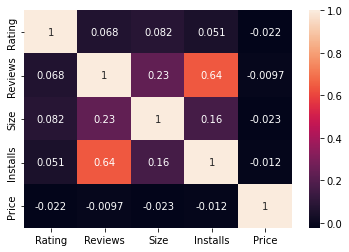

In [ ]:
corrMatrix = df.corr() 
sns.heatmap(corrMatrix , annot=True)
plt.show

#**Rating**

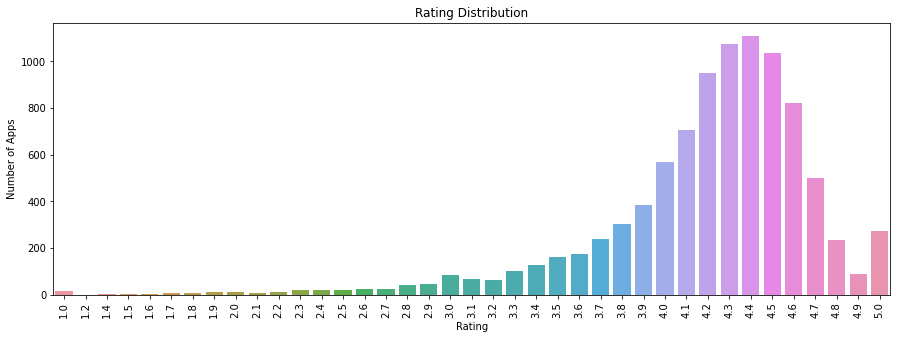

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Rating', data=df);
plt.title('Rating Distribution');
plt.xticks(rotation=90);
plt.ylabel('Number of Apps');
plt.show()

#**Category Vs Rating**

Text(0.5, 1.0, 'Category wise Rating')

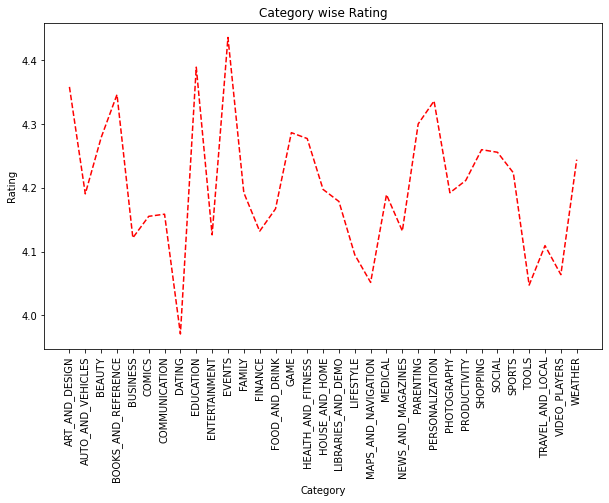

In [ ]:
grp=df.groupby('Category')
x=grp['Rating'].agg(np.mean)
plt.figure(figsize=(10,6))
plt.plot(x , 'r--' , color='r')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Category wise Rating')

#**Content Rating Vs Installs**

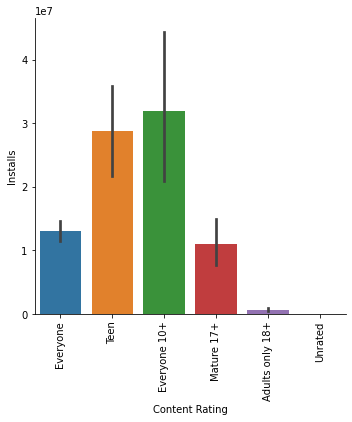

In [ ]:

sns.catplot(x='Content Rating', y='Installs', data=df,kind='bar');
plt.xticks(rotation=90);

#**Category Vs Installs**

Text(0.5, 1.0, 'Category wise Installs')

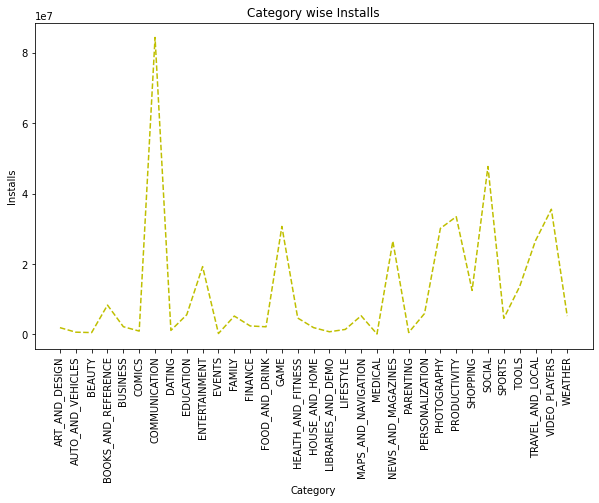

In [ ]:
grp=df.groupby('Category')
w=grp['Installs'].agg(np.mean)
plt.figure(figsize=(10,6))
plt.plot(w , 'r--' , color='y')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Category wise Installs')

Inference: The Most installs application are as follows communication , social , video player etc

#**Installs Vs genres**

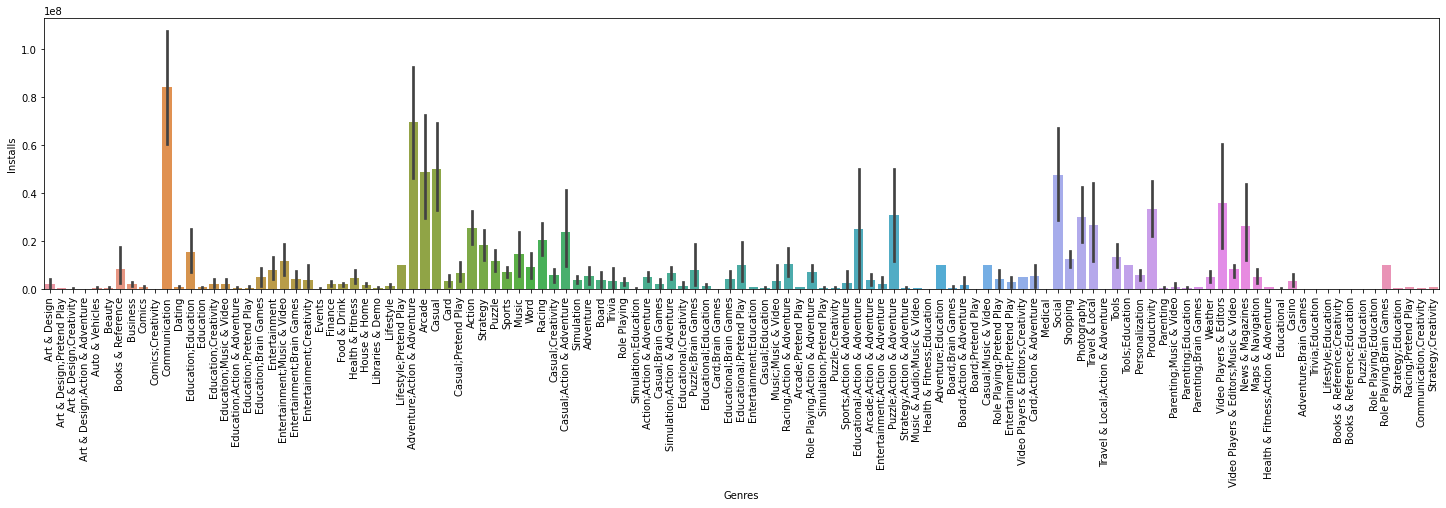

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(x='Genres', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

#**Category Vs Reviews**

Text(0.5, 1.0, 'Category wise Reviews')

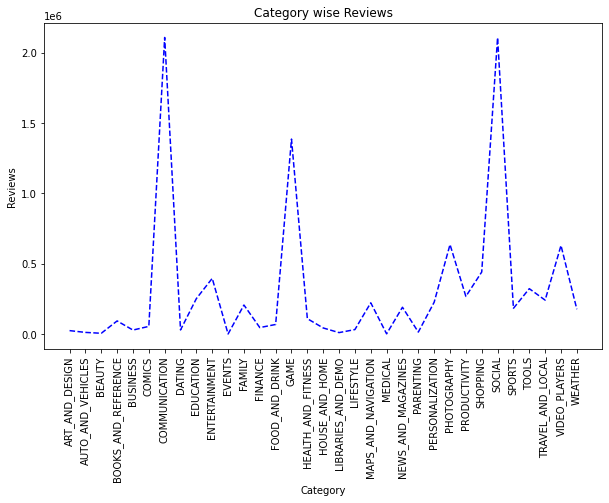

In [ ]:
grp=df.groupby('Category')
z=grp['Reviews'].agg(np.mean)
plt.figure(figsize=(10,6))
plt.plot(z , 'r--' , color='b')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Category wise Reviews')

Inference: We can see that Communication , Social And Games are mostly review by users

#**Installs Vs Price**

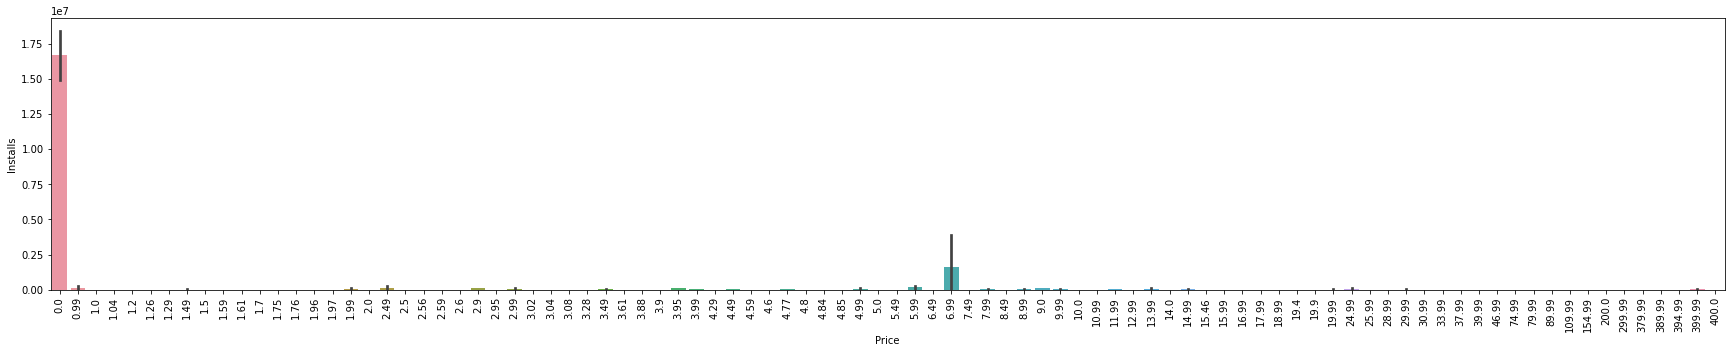

In [ ]:
fig, ax = plt.subplots(figsize=(30,5))
sns.barplot(x='Price', y='Installs', data=df,ax=ax);
plt.xticks(rotation=90);

#**Analysis Of User Review Data**

In [ ]:
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
#Drop missing data
df_review.dropna(inplace= True)

In [ ]:
#Drop the column 
df_review.drop("Translated_Review",axis= 1, inplace= True)

In [ ]:
# Rename the remaining column 
df_review.columns = ["App", "Sentiment", "polarity", "subjectivity"]
df_review

,App,Sentiment,polarity,subjectivity
0,10 Best Foods for You,Positive,1.000000,0.533333
1,10 Best Foods for You,Positive,0.250000,0.288462
3,10 Best Foods for You,Positive,0.400000,0.875000
4,10 Best Foods for You,Positive,1.000000,0.300000
5,10 Best Foods for You,Positive,1.000000,0.300000
...,...,...,...,...
64222,Housing-Real Estate & Property,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,Positive,0.800000,1.000000


In [ ]:
#shape before removing duplicates
df_review.shape

(37427, 4)

In [ ]:
len(df_review[df_review.duplicated()])

12343

In [ ]:
#list of all duplicates values
duplicate_review = df_review[df_review.duplicated(keep = 'last')]
print(duplicate_review)

                                  App Sentiment  polarity  subjectivity
0               10 Best Foods for You  Positive      1.00      0.533333
1               10 Best Foods for You  Positive      0.25      0.288462
3               10 Best Foods for You  Positive      0.40      0.875000
4               10 Best Foods for You  Positive      1.00      0.300000
5               10 Best Foods for You  Positive      1.00      0.300000
...                               ...       ...       ...           ...
64179  Hotwire Hotel & Car Rental App   Neutral      0.00      0.000000
64188  Hotwire Hotel & Car Rental App   Neutral      0.00      0.000000
64199  Housing-Real Estate & Property  Negative     -0.50      0.200000
64200  Housing-Real Estate & Property   Neutral      0.00      0.000000
64205  Housing-Real Estate & Property   Neutral      0.00      0.000000

[12343 rows x 4 columns]


In [ ]:
#Remove duplicates and save as new DataFrame
df_new_reviews = df_review.drop_duplicates()
df_new_reviews.shape

(25084, 4)

In [ ]:
df_new_reviews.isnull().sum()

App             0
Sentiment       0
polarity        0
subjectivity    0
dtype: int64

In [ ]:
df_new_reviews.describe()

,polarity,subjectivity
count,25084.000000,25084.000000
mean,0.189794,0.538103
std,0.355776,0.220541
min,-1.000000,0.000000
25%,0.000000,0.403700
50%,0.189167,0.540000
75%,0.416667,0.666667
max,1.000000,1.000000


#**Percentage of review sentiments**

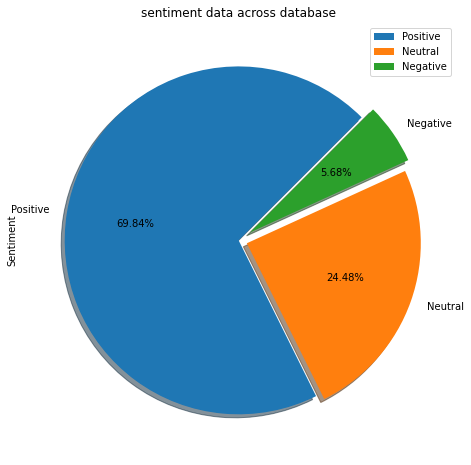

In [ ]:
plt.figure(figsize=(10,8))
labels=['Positive', 'Neutral', 'Negative']
pd.value_counts(df_new_reviews["Sentiment"]).plot(kind='pie', autopct= '%1.2f%%', shadow= True, explode=[0.0, 0.05, 0.08] ,startangle=45 ,labels= labels)
plt.legend()
plt.title("sentiment data across database")
plt.show()

Inference: From the above pie chart we can see Positive sentiment upto 70% , Neutral upto 25% appro. remaining is Negative

#**conclusion**



1)The rating is very high with atleast 75% of the apps in the range 4.0 to 4.7.

2)Among all rating of events apps is highest whereas dating apps has lowest rating.

3)Communication and social category apps has high reviews.

4)Most of the paid apps belongs to finance category.

5)There are more numbers of positive reviews of the apps in which facebook, instagram, whatsapp messanger are the most review apps.


